# Predicting the Popularity of Songs 
###### Alice He and Shrushti Manikandan

## Introduction



Thousands of songs are released on Spotify every year. However, just a small portion of those songs reach large audiences and are considered "popular". Through this project we intend to better understand whether different musical features have defined whether or not a song is popular over time. Ultimately, our goal is to be able to predict the popularity of a given song.

In order to do this, we will use [this dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) containing ~600k songs released between 1970-2021 to observe trends in song features and predict the popularity of songs.

## I. Loading and Cleaning the Data

### 1.1 Importing Libraries and Packages

Let's start by importing all of the packages we will need. Some key packages include: 

1. `pandas`: for most of our data manipulation
2. `BeautifulSoup`: to scrape data from Wikipedia pages
3. `seaborn` and `plotly`: for visualizing our data
4. `sklearn`: for modeling


In [ ]:
!apt update
!pip install pandasql
!pip install tabulate

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
from lxml import html
from bs4 import BeautifulSoup
from random import randint
import requests
import pandasql as ps #SQL on Pandas Dataframe
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from numpy import where
from prettytable import PrettyTable 

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



### 1.2 Downloading and Cleaning the Dataset
Now, let's download the dataset in its CSV form from Google Drive.

In [ ]:
!gdown --id 1FIywz7pJOLgj90YYkPJfOfOmCv_eFUNV

Downloading...
From: https://drive.google.com/uc?id=1FIywz7pJOLgj90YYkPJfOfOmCv_eFUNV
To: /content/tracks.csv
111MB [00:00, 155MB/s] 


Now, let's load this CSV file into a dataframe.

In [ ]:
data_df = pd.read_csv('tracks.csv')
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


We can now do some data cleaning. Notice that all of the artists' names are surrounded with square brackets and quotation marks. We need to get rid of these as well as any duplicate rows we might encounter.

In [ ]:
# clean artists column 
data_df['artists']=data_df['artists'].str.replace("[", "")
data_df['artists']=data_df['artists'].str.replace("]", "")
data_df['artists']=data_df['artists'].str.replace("'", "")
data_df['artists']=data_df['artists'].str.replace("\"", "")

In [ ]:
# drop duplicate rows
data_df=data_df.drop_duplicates()

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

The cell above shows that we don't have to deal with an null entries. Yay!

## II. Acquiring More Data

While loading the CSV file into a dataframe, we noticed a little bit of a problem- the popularity of each song was rated on a scale from 0 to 100. We were provided no information on how the popularity score was determined and what a given score actually means (is the score calculated based on the number of plays? or is it calculated by comparing the number of plays of a given song to songs released around the same time?). Given that our main goal for this project centers around the popularity of songs, we thought that we would develop a clearer, more transparent way of measuring popularity.


To do so, **we will gather all the songs that have reached the number-one spot of the Billboard Hot 100 chart between 1970 and 2020 by scraping the information off of Wikipedia pages**. Identifying the top songs of each year will give us a better idea of what was most popular during any given year.

### 2.1 Scraping Wikipedia Pages
We only need to scrape the song title and artist name for each of the number-one hits, we will have the features of each top track when we join our new dataframe constructed from the data on the Wikipedia pages with our original dataframe.

Gathering the information from the Wikipedia pages was actually more difficult than originally planned. Here are a list of issues we faced:


*   The HTML of the ~50 Wikipedia pages we had to scrape data from were very different in HTML structure- the table we needed data from was not always the first on the page so we couldn't grab the table through indexing and none of the tables shared a common class label so we couldn't use identifiers either. Therefore, the tools we learnt about in class like XPath and Pandas's built-in read_html feature were not detailed enough for our task. We decided to use the BeautifulSoup HTML parser instead as it provided us with more flexible functionality.
*   Even with the correct HTML table identified, the tables across the Wiki pages often had different formats. We had to write a lot of extra code to account for the different table layouts.
*   Some of the song names were formatted in a strange way, with multiple newlines that made it hard to parse and match up with our original dataframe. We had to write extra code to account for this too. 
*   When a song had multiple artists associated with it, the artist name was often written in different formats including words like "featuring", "ft.", and "and". These formats did not match up with the original dataframe's artist name format, so we had to identify these keywords and remove them from the artist names.
*   An additional problem that we decided was minor enough to not address: it is entirely possible that Wikipedia lists the artists for songs with multiple artists in an order that is different from the order given in the original dataset. One way we could have accounted for this is to replace the strings in the artist column with arrays and compared the artist name string from the original dataframe with every possible permutation of the artists.



In [ ]:
years = np.arange(1970, 2021, 1)
wiki_data = []

for year in years:
  url = "https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number_ones_of_" + str(year)
  webpage = requests.get(url).text

  soup = BeautifulSoup(webpage, 'html.parser')
  table = soup.find_all("table", attrs={"class": "wikitable"})

  # extra warning tables on some pages
  if (len(table) > 1):
    table_num = 1
  else:
    table_num = 0
  
  count = 0
  for row in table[table_num].tbody.findAll('tr'):
      if (count == 0): 
        count+= 1
        continue

      td = row.findAll('td')
      if (len(td) > 2):
        if (len(td) >= 5):
          song_arr = td[2].findAll(text=True)
          artist_arr = td[3].findAll(text=True)
        else: 
          song_arr = td[1].findAll(text=True)
          artist_arr = td[2].findAll(text=True)

        song_arr = [song.rstrip('\n') for song in song_arr if str(song)]

        if (len(song_arr) == 1):
          song = song_arr[0]
        elif (len(song_arr) == 0):
          continue
        else:
          song = song_arr[1]

        for artist in artist_arr:
            if (artist == '\n'):
              artist_arr.remove(artist)

        artist_arr = [artist.rstrip('\n') for artist in artist_arr if str(artist)]

        if (len(artist_arr) == 1):
          artist = artist_arr[0]
        else:
          artist = ''.join(artist_arr)
        
      wiki_data.append([song, artist])

wiki_data[-10:-1]

[['Mood', '24kGoldn featuring Iann Dior'],
 ['Mood', '24kGoldn featuring Iann Dior'],
 ['Positions', 'Ariana Grande'],
 ['"Mood"', '24kGoldn featuring Iann Dior'],
 ['"Mood"', '24kGoldn featuring Iann Dior'],
 ['"Mood"', '24kGoldn featuring Iann Dior'],
 ['Life Goes On', 'BTS'],
 ['"Mood"', '24kGoldn featuring Iann Dior'],
 ['"All I Want for Christmas Is You"', 'Mariah Carey']]

### 2.2 Cleaning the Wikipedia Data

Now we need to clean data again. Like the dataset from Kaggle, the song titles in this dataframe have quotation marks around them so we have to remove them along with any duplicate entries. As noted above, we have to get rid of any keywords and conjunctions in the artist name so that it matches the format in the Kaggle dataset (only commas), so we'll do that here.

In [ ]:
# Create dataframe for wikipedia data
wiki_df = pd.DataFrame(wiki_data, columns = ['name', 'artists'])

# Remove quotations
wiki_df['name'] = wiki_df['name'].str.replace('"', '')
wiki_df['name'] = wiki_df['name'].str.replace('"', '')

In [ ]:
# Deal with &, featuring, ',', etc.
def clean_artists(artists):
  res = [artist.replace(' and', ',') for artist in artists if str(artist)]
  res = [artist.replace(' featuring', ',') for artist in artists if str(artist)]
  return res

wiki_df = wiki_df.assign(artists = lambda x: clean_artists(x['artists']))

# Drop duplicates
wiki_df.drop_duplicates(inplace=True, ignore_index=True)

### 2.3 Joining the Wikipedia Data with the Original Dataset


In [ ]:
join_query = 'SELECT * FROM data_df JOIN wiki_df ON data_df.name = wiki_df.name AND data_df.artists = wiki_df.artists'

combined_df = ps.sqldf(join_query, locals());

In [ ]:
combined_df.drop_duplicates(inplace=True, ignore_index=True)
combined_df.sample(n=10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,name,artists
597,466cKvZn1j45IpxDdYZqdA,Toosie Slide,77,247059,1,Drake,['3TVXtAsR1Inumwj472S9r4'],2020-05-01,0.830,0.490,1,-8.820,0,0.2090,0.28900,0.000003,0.1130,0.845,81.604,4,Toosie Slide,Drake
1078,1G88BbuMts7HC0nHGoHmhv,Here Comes the Hotstepper,46,247467,0,Ini Kamoze,['1VJspRsoC6c0bvqhnSiFCs'],2007-12-28,0.707,0.525,7,-7.356,1,0.3020,0.01700,0.000162,0.0771,0.476,200.753,4,Here Comes the Hotstepper,Ini Kamoze
1086,3UT4gyENyYB6vQpifOlQwL,When a Man Loves a Woman,31,231067,0,Michael Bolton,['6YHEMoNPbcheiWS2haGzkn'],1991-04-19,0.476,0.363,1,-10.706,1,0.0296,0.20000,0.000000,0.0550,0.243,164.555,3,When a Man Loves a Woman,Michael Bolton
803,34rlZuc87vHqiVZxRMmUPX,You Should Be Dancing,28,253867,0,Bee Gees,['1LZEQNv7sE11VDY3SdxQeN'],1977-12-12,0.677,0.692,0,-13.033,1,0.0465,0.01920,0.128000,0.1320,0.956,123.381,4,You Should Be Dancing,Bee Gees
738,2pbWkjtGtjkzBdZ95GFINm,Car Wash,57,307573,0,Rose Royce,['1OxJzMLmR9l5zPLap9OxuO'],1976-01-01,0.667,0.521,9,-13.212,0,0.1150,0.20200,0.000066,0.0723,0.856,117.917,4,Car Wash,Rose Royce
1089,4UmWMampmUhXLA2mTs34Yq,Amazed,28,240867,0,Lonestar,['3qbnxnvUqR14MJ9g8QwZJK'],1999-05-31,0.561,0.543,1,-8.498,1,0.0324,0.26000,0.000000,0.1240,0.243,139.803,4,Amazed,Lonestar
366,09I1TnKW1WPtD8tnQxRtkD,You're Makin' Me High,50,267267,0,Toni Braxton,['3X458ddYA2YcVWuVIGGOYe'],1996,0.852,0.576,10,-8.668,0,0.0377,0.01080,0.000012,0.0848,0.902,92.123,4,You're Makin' Me High,Toni Braxton
841,58c8pMaXi3xdpBIVfG6WGC,More Than Words,36,334000,0,Extreme,['6w7j5wQ5AI5OQYlcM15s2L'],1990-08-07,0.403,0.134,6,-14.955,1,0.0353,0.46900,0.000000,0.1130,0.258,182.894,4,More Than Words,Extreme
415,0gmbgwZ8iqyMPmXefof8Yf,How You Remind Me,80,223840,0,Nickelback,['6deZN1bslXzeGvOLaLMOIF'],2001-09-11,0.446,0.764,10,-5.042,1,0.0330,0.00135,0.000000,0.0990,0.543,172.094,4,How You Remind Me,Nickelback
1095,6KFi8BsQQUWTiYqqHz6Hn4,Holding Back the Years,12,270107,0,Simply Red,['1fa0cOhromAZdq2xRA4vv8'],2013-11-29,0.709,0.502,9,-9.267,0,0.0283,0.55800,0.000079,0.0917,0.551,86.042,4,Holding Back the Years,Simply Red


An important observation: notice how varied the popularity scores are for our new dataframe. **Despite the fact that all of these songs reached the number-one spot of the Billboard Hot 100 chart in their year of release, their popularity scores are drastically different.** In fact, a quick look at the minimum and maximum popularity scores of this dataframe of number-one hits show that the popularity rating column has a range of 96 despite the fact that the only values allowed are between 0 and 100. This calculation confirms the fact that the popularity score from the Kaggle dataset is unreliable in our goal to predict song popularity. 

Instead, the score was probably based on a numeric metric like number of plays rather than a more relative metric like performance in the music industry compared to other songs released around the same time. If we pull out all the songs with a popularity rating of 95 and over from the original datset, we see that the only songs that pop up are ones that have been released within the past year or so. It is also possible then that the popularity rating is based on how popular the song is right now (perhaps how many times it is played within a given week or month) regardless of when it was released. No matter what, the popularity rating does not follow our definition of popularity.

In [ ]:
# printing the range of popularity scores
print(combined_df['popularity'].max() - combined_df['popularity'].min())

96


In [ ]:
data_df[data_df['popularity'] >= 95]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,Tiësto,['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"Bruno Mars, Anderson .Paak, Silk Sonic","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4


## III. Exploratory Data Analysis


### 3.1 Preparing the Data for EDA

We can start conducting exploratory data analysis by first making the data a little easier to plot. When dealing with the release dates of each track, we don't really care much about the specifics, we just need the track's release year so let's extract that and create a new column. It'll make EDA on the dataframe a little easier.

In [ ]:
combined_df['year'] = pd.to_datetime(combined_df['release_date'])
combined_df['year'] = pd.DatetimeIndex(combined_df['release_date']).year

Now we can order our data by year! Doing so allows us to calculate the mean of each feature for each year so we can plot the data in a more efficient manner.

In [ ]:
eda_query = 'SELECT * FROM combined_df ORDER BY year ASC'
eda_df = ps.sqldf(eda_query, locals());

In [ ]:
# drop all 2021 rows since the year is not complete 
eda_df = eda_df[eda_df.year != 2021]
eda_df = eda_df[eda_df.year >= 1970]

# drop columns that don't have meaningful numeric data
drop_df = eda_df.drop(columns = {"artists", "explicit", "name", "popularity", "release_date", "mode", "time_signature"})
group_df = drop_df.groupby("year")

# find the average values of different features for each year
mean_df = group_df.mean()
mean_df = mean_df.reset_index()

In [ ]:
mean_df.head(5)

,year,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1970,212435.666667,0.586167,0.630583,3.416667,-9.976917,0.050950,0.374075,0.000660,0.216225,0.730417,118.627167
1,1971,253153.250000,0.564813,0.586875,4.062500,-9.166625,0.047287,0.451012,0.009321,0.164306,0.691250,122.855812
2,1972,221812.176471,0.605000,0.521765,3.058824,-11.527176,0.059571,0.385176,0.110234,0.143541,0.613412,117.214529
3,1973,226364.222222,0.541833,0.522833,5.833333,-10.576722,0.038761,0.398472,0.000139,0.134906,0.659333,128.468389
4,1974,218650.423077,0.538385,0.552769,7.000000,-10.454077,0.042992,0.421971,0.013038,0.159500,0.644231,118.149769


### 3.2 A General Overview

Let's first take a look at the data we're working with- is most of it collected in the past few years or do we have a pretty evenly distributed dataset?

Text(0.5, 1.0, 'Number of Songs per Year')

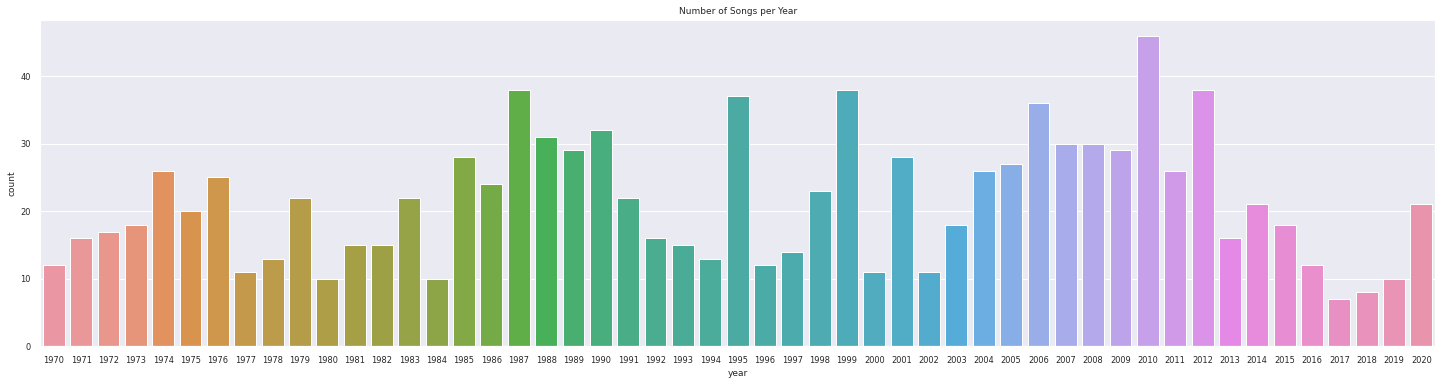

In [ ]:
sns.set(rc={'figure.figsize':(25 ,6)})
sns.set(font_scale = 0.75)
sns.countplot(data=eda_df, x='year').set_title('Number of Songs per Year')

Funnily enough, the plot of how much data was collected per year looks like a sine wave. Probably a coincidence, but still pretty interesting.
Now, let's take a look at the most popular artists from 1970 to 2020. 

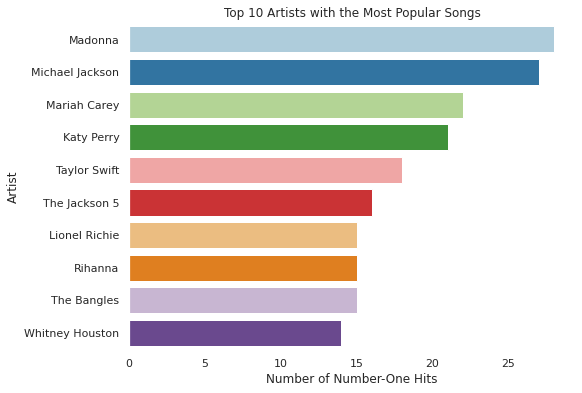

In [ ]:
top_artists_query = 'SELECT artists, COUNT(*) AS numtracks FROM eda_df GROUP BY artists ORDER BY numtracks DESC LIMIT 10'
top_artists_df = ps.sqldf(top_artists_query, locals());

sns.set(rc={'figure.figsize':(8, 6), 'figure.facecolor':'white', 'axes.facecolor':'white'})

s = sns.barplot(y=top_artists_df.artists, x=top_artists_df.numtracks, orient="h", palette='Paired')
s.set_xlabel('Number of Number-One Hits')
s.set_ylabel('Artist')
s.set_title('Top 10 Artists with the Most Popular Songs')
plt.show()

### 3.3 Feature Trends
For the EDA portion of this project, we wanted to analyze how different features in popular songs have changed over time. 
The following graphs show how each feature of Bill Board top songs have changed since 1970 to 2021.

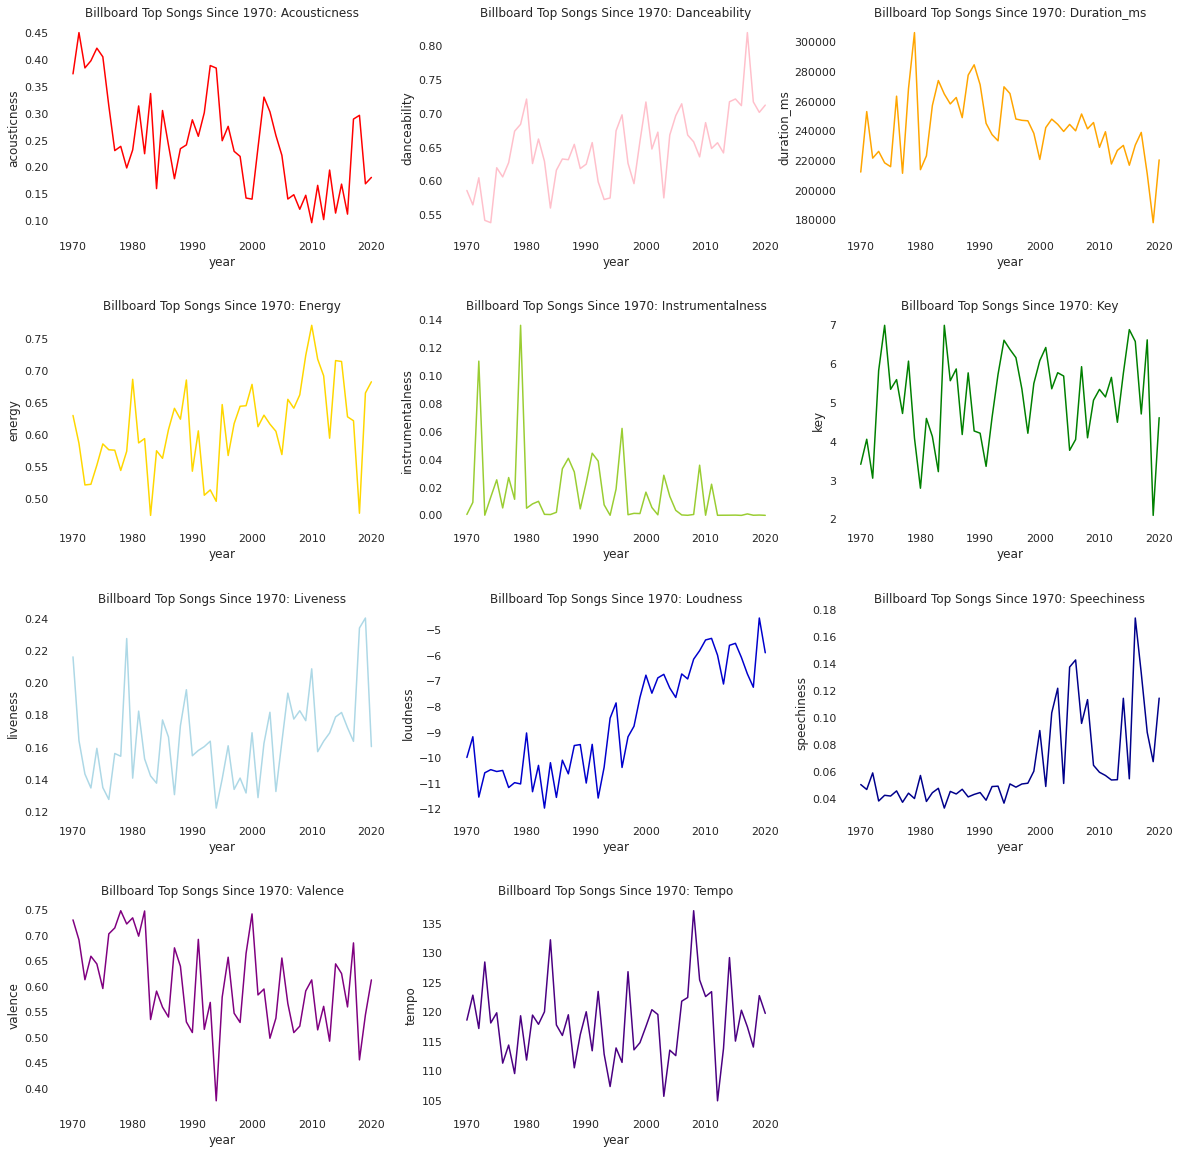

In [ ]:
fig = plt.figure()
fig.set_size_inches(20, 20)
fig.subplots_adjust(hspace=0.4)

features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
colors = ['red', 'pink', 'orange', 'gold', 'yellowgreen', 'green', 'lightblue', 'mediumblue', 'darkblue', 'purple', 'indigo']
feat_dict = {i : features[i] for i in range (0, len(features))}

for i in range(11):
  ax = 'ax%s' % (i + 1)
  feature = feat_dict.get(i)
  
  ax = fig.add_subplot(4, 3, i + 1)
  ax.plot(mean_df['year'], mean_df[feature], color=colors[i])
  ax.set_title("Billboard Top Songs Since 1970: " + feature.capitalize())
  ax.set_xlabel('year')
  ax.set_ylabel(feature)

It looks like acousticness, danceability, loudness, and speechiness are the features that have experienced the greatest change over time. Songs have gotten louder, more danceable, and speechier while also becoming less acoustic. 
Indeed, if we generate a heat map of all the features, we see that these are the features that are highly correlated with year of release. 

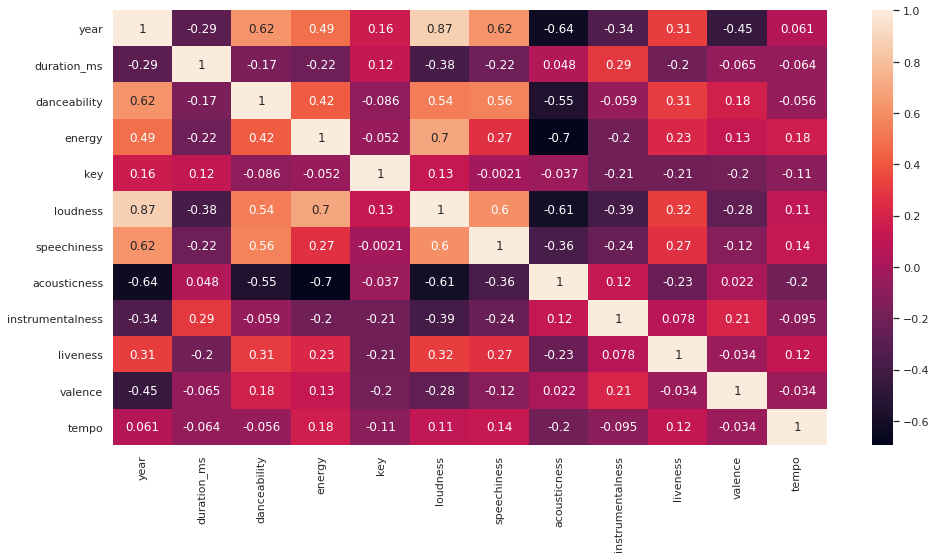

In [ ]:
plt.figure(figsize=(16, 8))
corr = mean_df.corr()
sns.heatmap(corr,annot=True)

An alternate way to observe how song features have changed over time is using radar charts. Let's create a radar chart for every 5-year period between 1970 and 2020. As we can see, the 1970-1974 chart is significantly less energetic, danceable, and speechy than the most recent chart while it is more acoustic and loud.

In [ ]:
quinquennial_df = mean_df.groupby(np.arange(len(mean_df))//5).mean()
quinquennial_df = quinquennial_df[['danceability', 'loudness', 'speechiness', 'acousticness', 'energy']]
quinquennial_df['loudness'] = quinquennial_df['loudness'].abs()

x = quinquennial_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
quinquennial_df = pd.DataFrame(x_scaled, columns=quinquennial_df.columns)

year = 1970
for i in range(len(quinquennial_df)):
  row_df = pd.DataFrame(dict(r=quinquennial_df.iloc[i].tolist(), theta=quinquennial_df.columns))
  fig = px.line_polar(row_df, r='r', theta='theta', line_close=True, height=400, title="Features from " + str(year) + " to " + str(year+4))
  fig.update_traces(fill='toself')
  fig.show()
  year+=5

We can also plot the song features on a 3D scatter plot. As each point is color coded by year, we can see that songs are becoming more danceable.

In [ ]:
px.scatter_3d(x=mean_df.acousticness, y=mean_df.loudness, z=mean_df.danceability, color=mean_df.year, labels={'x':'acousticness', 'y':'loudness', 'z':'danceability', 'color':'year'})

## IV. Adjusting Data Imbalances

### 4.1 Observing the Imbalances

Before we perform any machine learning tasks on our dataset, let's look at the distribution of our data.

Text(0.5, 1.0, 'Number of Popular and Unpopular Songs')

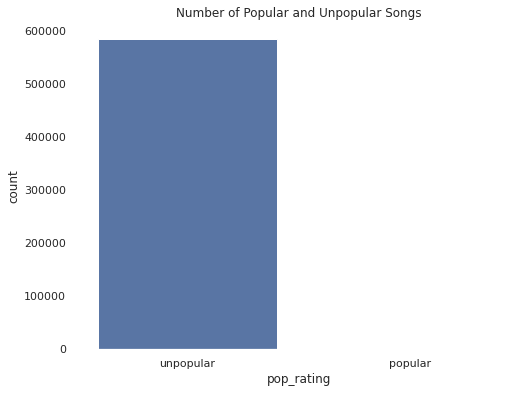

In [ ]:
combined_df['pop_rating'] = 'popular'
data_df['pop_rating'] = data_df['id'].isin(combined_df['id'])
data_df.replace(False, 'unpopular', inplace=True)
data_df.replace(True, 'popular', inplace=True)
sns.countplot(x='pop_rating', data=data_df).set_title('Number of Popular and Unpopular Songs')

Unfortunately, it looks like our dataset has an extreme imbalance- popular songs only make up ~0.2% of our dataset.

In [ ]:
print('Number of popular songs from new dataset: ' + str(len(combined_df[combined_df['pop_rating'] == 'popular'])))
print('Percentage of songs that are popular: ' + str(((len(data_df[data_df['pop_rating'] == 'popular'])) / len(data_df)) * 100) + '%')

Number of popular songs from new dataset: 1167
Percentage of songs that are popular: 0.19891864619412553%


Even if we define popularity using the original popularity metric from the Kaggle dataset (let's say a song is popular if its popularity score is above 70), it looks like popular songs only make up about 1.25% of all of our songs.

In [ ]:
print('Number of popular songs from original dataset: ' + str(len(data_df[data_df['popularity'] >= 70])))
print('Percentage of songs that are popular from the original dataset: ' + str(((len(data_df[data_df['popularity'] >= 70])) / len(data_df)) * 100) + '%')

Number of popular songs from original dataset: 7323
Percentage of songs that are popular from the original dataset: 1.2482272888428287%


### 4.2 Adding More Popular Songs

As an effort to correct this imbalance in the dataset, let's start by expanding our definition of popularity. Let's say that any song that has appeared on the Billboard Hot 100 chart between 1970-2020 is popular. Hopefully this'll add more data to our severly underrepresented collection of songs that are deemed popular. Since neither Wikipedia nor Billboard keeps pages containing information about the weekly Hot 100 chart since 1970, let's use [this dataset](https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019) instead. We'll start by downloading and cleaning it.

In [ ]:
!gdown --id 17_y2LxWswx8fkbEOBlF7UB3c_ErK0lGX

Downloading...
From: https://drive.google.com/uc?id=17_y2LxWswx8fkbEOBlF7UB3c_ErK0lGX
To: /content/billboard.csv
218MB [00:01, 172MB/s]


In [ ]:
billboard_df = pd.read_csv('billboard.csv')
billboard_df.head(5)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


We can drop all of the columns we don't need (which is most of them) since we'll join this dataframe back with our main dataframe from the original dataset. Let's also group the data by name and artist and get the max weekly rank of each song since there are most likely multiple rows for each song.

In [ ]:
billboard_df.drop(['Unnamed: 0', 'Peak.position', 'Weeks.on.chart', 'Week', 'Genre', 'Writing.Credits', 'Lyrics', 'Features', 'Date'], axis=1, inplace=True)
grouped_df = billboard_df.groupby(['Name', 'Artists'])
max_df = grouped_df.max().reset_index()
max_df.head(5)

,Name,Artists,Weekly.rank
0,'03 Bonnie & Clyde,Jay,56
1,...Ready For It?,Taylor Swift,96
2,0 To 100 / The Catch Up,Drake,64
3,1,800,68
4,1 Thing,Amerie,100


Now we can join this dataframe with data_df to get all of the features of each song.

In [ ]:
join_query_2 = 'SELECT * FROM data_df JOIN max_df ON data_df.name = max_df.Name AND data_df.artists = max_df.Artists'
combined_df_2 = ps.sqldf(join_query_2, locals());
combined_df_2.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_rating,Name,Artists,Weekly.rank
0,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,61,130973,0,Bobby Helms,['38EmEgXkgK51MT2tPY0EoC'],1957-12-02,0.754,0.424,2,-8.463,1,0.0363,0.643,0.000000,0.0652,0.806,119.705,4,unpopular,Jingle Bell Rock,Bobby Helms,47
1,3QiAAp20rPC3dcAtKtMaqQ,Blue Christmas,58,129173,0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],1957-10-15,0.465,0.270,4,-16.661,1,0.0425,0.900,0.001040,0.1450,0.580,94.518,4,unpopular,Blue Christmas,Elvis Presley,40
2,5ASM6Qjiav2xPe7gRkQMsQ,Sleigh Ride,57,181267,0,The Ronettes,['7CyeXFnOrfC1N6z4naIpgo'],1963,0.529,0.772,2,-7.013,1,0.0287,0.403,0.000002,0.3160,0.853,91.751,4,unpopular,Sleigh Ride,The Ronettes,41
3,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,63,126267,0,Brenda Lee,['4cPHsZM98sKzmV26wlwD2W'],1964-10-19,0.589,0.472,8,-8.749,1,0.0502,0.614,0.000000,0.5050,0.898,67.196,4,unpopular,Rockin' Around The Christmas Tree,Brenda Lee,50
4,4cXnUi6qulwgj0fLSu0VYE,Rubberneckin',42,133813,0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],1970-10-01,0.623,0.613,10,-10.099,1,0.0698,0.231,0.000000,0.1200,0.918,144.334,4,unpopular,Rubberneckin',Elvis Presley,100


Looks like we have 4823 new songs that can be identified as popular. Let's change the popularity ranking of each of these songs in the original dataframe (data_df).

In [ ]:
combined_df_2.drop(['Name', 'Artists'], axis=1, inplace=True)
combined_df_2.rename(columns={'Weekly.rank': 'rank'}, inplace=True)

combined_df_2['pop_rating'] = 'popular'
combined_df_2['pop_rating'].value_counts()

popular    4823
Name: pop_rating, dtype: int64

In [ ]:
data_df['pop_rating_2'] = data_df['id'].isin(combined_df_2['id'])
data_df.replace('unpopular', False, inplace=True)
data_df.replace('popular', True, inplace=True)

data_df['pop_rating'] = data_df[['pop_rating_2', 'pop_rating']].any(axis='columns') 

data_df.drop(columns='pop_rating_2', inplace=True)
data_df.replace(False, 0, inplace=True)
data_df.replace(True, 1, inplace=True)

Great! Now popular songs make up about 1% of the dataset! Still not great, but this is 5x better than before!

In [ ]:
print('Percentage of songs that are popular: ' + str(((len(data_df[data_df['pop_rating'] == 1])) / len(data_df)) * 100) + '%')

Percentage of songs that are popular: 0.9732866064853956%


### 4.3 Resampling

We can also attempt to fix the data imbalance by resampling.

In [ ]:
X = data_df.copy().drop(columns=['id', 'name', 'popularity', 'artists', 'id_artists', 'release_date', 'pop_rating'])
y = data_df['pop_rating'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


Counter({0: 580962, 1: 5710})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 580962, 1: 580962})


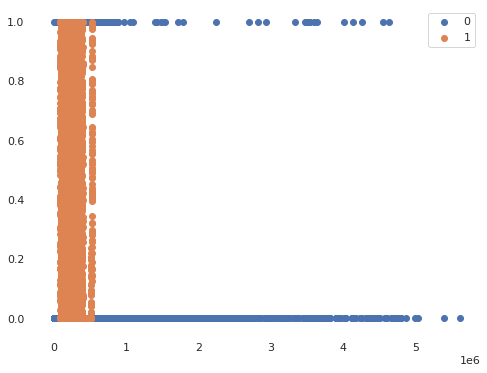

In [ ]:
counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
# drop 'popularity' because we are using 'pop_rating' instead
data_df.drop(columns={'popularity'}, inplace=True)

## V. Modeling 

In this section, we will be testing different modeling methods to find the one that yields the highest accuracy for predicting a song's popularity. The first model that is tested is the basic linear regression model, which (as expected) has a relatively low accuracy. Then, ridge regression is applied, which as you will see below also has a fairly low accuracy rating. 

In order to improve the accuracy, we then applied classification using the Decision Tree Classifier model and Random Forest Classifier model. Classification helped increased the accuracy for predicting a song's popularity, as you will see in this section.

### 5.1 Linear Regression

First, we are trying basic linear regression.

In [ ]:
# Randomize order of the data
reg_df = data_df.sample(frac=1.0).reset_index(drop=True)

# drop non-numeric columns
X = data_df.copy().drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date', 'pop_rating'])
Y = data_df['pop_rating'].astype(int)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

lr_acc = lin_reg.score(x_test, y_test)
print('Accuracy score: ' + str(lr_acc))

Accuracy score: 0.01273053171454086


As you can see, the accuracy score (represented by R^2 value) is ~0.011, which is fairly low. This makes sense because Linear Regression doesn't necessarily account for the significant variations between popular and unpopular songs.

### 5.2 Ridge Regression

We are now trying Ridge Regression to see if it improves the results.

In [ ]:
ridge_reg = Ridge(alpha=0.5, normalize=True)
ridge_reg.fit(x_train, y_train)

rr_acc = ridge_reg.score(x_test, y_test)
print('Accuracy score: ' + str(rr_acc))

Accuracy score: 0.011192841354967342


Ridge regression actually made the R^2 value worse. 
We can now see if Grid Search Validation with Ridge Regression makes the accuracy any better. 

In [ ]:
param = {'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.01]}

GS_obj = GridSearchCV(Ridge(normalize=True), param)

GS_obj.fit(x_train, y_train)

print('Best Alpha Value: ' + str(GS_obj.best_params_))
rr_acc2 = GS_obj.best_score_
print('Best Accuracy Score: ' + str(rr_acc2))

Best Alpha Value: {'alpha': 0.002}
Best Accuracy Score: 0.01181572115651779


The R^2 value has improved a small bit from ~0.011 (without grid search validation) to ~0.012 (with grid search validation). However, the scores are still quite low.

### 5.3 Classification

Another modelling approach that we can try is classification. In section IV, the data was classified into two groups – popular and unpopular. Popular and unpopular songs likely have variations between their features, thus making classification an approach worth trying. Classification will be used to test accuracies using a Decision Tree Classifier model and a Random Forest Classifier model. 

In [ ]:
df_class = data_df.copy().drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date'])

In the following cell, we are creating training and testing sets for the popular songs and unpopular songs separately.

In [ ]:
df_pop = df_class[df_class.pop_rating == 1]

df_unpop = df_class[df_class.pop_rating == 0]

Xp = df_pop.drop(columns=['pop_rating'])
Yp = df_pop['pop_rating'].astype(int)

Xu = df_unpop.drop(columns=['pop_rating'])
Yu = df_unpop['pop_rating'].astype(int)

xp_train, xp_test, yp_train, yp_test = train_test_split(Xp, Yp, test_size=0.20)

xu_train, xu_test, yu_train, yu_test = train_test_split(Xu, Yu, test_size=0.20)

In [ ]:
# merge training and test data 
tr_pop = pd.concat([xp_train, yp_train], axis = 1)
tr_unpop = pd.concat([xu_train, yu_train], axis = 1)
concat_tr = pd.concat([tr_pop, tr_unpop])

# randomize order of data
training_df = concat_tr.sample(frac=1.0).reset_index(drop=True)

test_pop = pd.concat([xp_test, yp_test], axis = 1)
test_unpop = pd.concat([xu_test, yu_test], axis = 1)
concat_test = pd.concat([test_pop, test_unpop])

# randomize order of data
test_df = concat_test.sample(frac=1.0).reset_index(drop=True)

We are splitting the training set in order to set up a validation set.

In [ ]:
# split training_df into training and validation data

x_split = training_df.drop(columns=['pop_rating'])
y_split = training_df['pop_rating'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x_split, y_split, test_size=0.20)

#### 5.3a Decision Tree Classifier

The first classifier we are testing is a simple Decision Tree Classifier. 

In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=25)
dec_tree.fit(x_train, y_train)

pred_dt = dec_tree.predict(x_test)
dt_acc = accuracy_score(pred_dt, y_test)
print('Accuracy Score: ' + str(dt_acc))

Accuracy Score: 0.9862253377082711


As you can see, the accuracy score of ~0.98 is fairly high. This is a massive increase from the accuracy we were getting with Linear and Ridge Regression, which was ~0.01. 

Now, we want to see if the score can improve with some hypertuning of the model.

In [ ]:
# parameter tuning
params = {'max_depth': [1, 2, 4, 6, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}

GS_dt = GridSearchCV(DecisionTreeClassifier(), params)

GS_dt.fit(x_split, y_split)

print('Best Alpha Value: ' + str(GS_dt.best_params_))
dt_acc2 = GS_dt.best_score_
print('Best Score: ' + str(dt_acc2))

Best Alpha Value: {'max_depth': 4, 'min_samples_leaf': 1}
Best Score: 0.9902735135106095


Hypertuning the parameters improved accuracy by about 0.01. The validation set below also outputs a similar accuracy score of ~0.99.

In [ ]:
# test it on validation set
dt_prediction = GS_dt.best_estimator_.predict(x_test)

dt_acc_val = accuracy_score(dt_prediction, y_test)
print('Accuracy Score: ' + str(dt_acc_val))

Accuracy Score: 0.9904120680103976


#### 5.3b Random Forest Classifier

The accuracy that we derived from the Decision Tree Classifier was certainly high. As a final step, we will apply a Random Forest Classifier to see if this model can improve the accuracy any further.

As you can see below, the accuracy score improved just slightly (~0.002) with the Random Forest Classifier.

In [ ]:
rand_for = RandomForestClassifier(n_estimators=100)
rand_for.fit(x_train, y_train)

pred_rf = rand_for.predict(x_test)
rf_acc = accuracy_score(pred_rf, y_test)
print('Accuracy Score: ' + str(rf_acc))

Accuracy Score: 0.9933097541228108


At this point, we have attained a high accuracy of 0.99 from both of the classification models, implying that classification was clearly effective in predicting a song's popularity.

### 5.4 Identifying the Best Model

In steps 5.1 to 5.3, we tested different modeling methods, including Linear Regression, Ridge Regression, Decision Tree Classifier, and Random Forest Classifier. Each of these four models had different accuracy scores. As you can see in the chart below, Random Forest Classifier had the best accuracy (~ 0.993) and Linear Regression had the worst accuracy (~ 0.011).

In [ ]:
table = PrettyTable(["Modeling Method", "Accuracy Score"])   
table.add_row(["Linear Regression", round(lr_acc, 4)]) 
table.add_row(["Ridge Regression", round(rr_acc2, 4)]) 
table.add_row(["Decision Tree Classifier", round(dt_acc_val, 4)]) 
table.add_row(["Random Forest Classifier", round(rf_acc, 4)]) 
print(table)

+--------------------------+----------------+
|     Modeling Method      | Accuracy Score |
+--------------------------+----------------+
|    Linear Regression     |     0.0127     |
|     Ridge Regression     |     0.0118     |
| Decision Tree Classifier |     0.9904     |
| Random Forest Classifier |     0.9933     |
+--------------------------+----------------+


## Conclusion

As music lovers, we thought that it would be interesting to create a project based on songs and trends have changed over the years. We drew from many of the skills and tools we learnt about throughout this course such as data cleaning, data wrangling, data visualization, and machine learning to eventually predict the popularity of songs. 

**Challenges and Obstacles** 

Completing the project was certainly not an easy task. We faced many challenges and obstacles. While our original dataset did not require any extensive amount of data cleaning, the addition of Wikipedia data generated many more issues with cleaning and wrangling. Additionally, our dataset had an extreme level of data imbalance that we struggled to correct. We encountered even more obstacles with machine learning, as the immense amount of data we had caused problems with runtimes.

**Futures Opportunities** 

The Spotify dataset offers many more opportunities for data analysis and exploration. Below are some additional tasks we did not have time to explore in our investigation: 


*   Unsupervised machine learning for genre analysis 
*   Creating a Spotify playlist generator or song recommender 
*   Predicting what songs will be like in the future using time-series analysis


